In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sb

In [82]:
columns = ['Year', 'Week Start', 'Week End', 'Section', 'Number', 'Headline', 'Body Text']
articles_df = pd.read_csv('articles_db.csv', names=columns)

In [83]:
articles_df.head(100)

,Year,Week Start,Week End,Section,Number,Headline,Body Text
0,2000,2000-01-03,2000-01-09,business,0,There's no time to waste,"Over the past few months, President Clinton ha..."
0,2000,2000-01-03,2000-01-09,business,1,Ford staff threaten strike,Leaders of salaried staff at Ford are threaten...
0,2000,2000-01-03,2000-01-09,business,2,There's no time to waste,"Over the past few months, President Clinton ha..."
0,2000,2000-01-03,2000-01-09,business,3,Cybersquatters with an eye for domain chance,"What's in a domain name? Loadsamoney, apparent..."
0,2000,2000-01-03,2000-01-09,business,4,Clicks and mortar leave property crumbling away,The property market looks in pretty good healt...
0,2000,2000-01-03,2000-01-09,business,5,Labour isn't working hard enough,Few people I know would dissent from the propo...
0,2000,2000-01-03,2000-01-09,business,6,Dunces excel in the knowledge economy,While all the fashionable blather is of a know...
0,2000,2000-01-03,2000-01-09,business,7,Russia Y2K bill 'shows West overreacted',Russia spent just $200 million on preparing fo...
0,2000,2000-01-03,2000-01-09,business,8,Briefcase,"BUY... Domino's Pizza company, which last week..."
0,2000,2000-01-03,2000-01-09,business,9,TransTec duo kept silent on £11m claim,"Two former executive directors of TransTec, th..."


In [84]:
articles_df.shape

(88745, 7)

In [85]:
relevant_words = np.genfromtxt('Keywords.txt', dtype='str')

In [86]:
def find_relevant(text, n):
    text = str(text)
    num_relevant_words = [word for word in relevant_words if ((' '+word+' ') in text)]
    if len(num_relevant_words) > n:
        return True
    else:
        return False

In [87]:
text = articles_df['Body Text'].values[0]

n= 7
relevant_articles = [find_relevant(text, n) for text in articles_df['Body Text'].values]
relevant_df = articles_df[relevant_articles]
weekly_articles = relevant_df.groupby('Week Start').size().reset_index()

### Look at the most frequently occuring words in the relevant articles

In [88]:
business_news = relevant_df[relevant_df['Section'] == 'business']
business_news.head()

,Year,Week Start,Week End,Section,Number,Headline,Body Text
0,2000,2000-01-10,2000-01-16,business,1,Confidence in a tarnished age,Confidence is at the heart of economic policy....
0,2000,2000-01-17,2000-01-23,business,2,Banker with Euro vision,The president of the European Central Bank is ...
0,2000,2000-01-17,2000-01-23,business,7,Mean times over Greenwich,On New Year's Eve a prominent industrialist an...
0,2000,2000-01-24,2000-01-30,business,2,Euro tests fall short,For a Government policy which began in the pub...
0,2000,2000-01-24,2000-01-30,business,27,ECB in the dock over exchange rate,With Rhodia just about to sign up a 1.2bn euro...


In [89]:
vectorizer = CountVectorizer(min_df=2, stop_words='english')
business_words = vectorizer.fit_transform(business_news['Body Text'])

In [ ]:
business_word_freqs = [(word, business_words.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_business_words = sorted (business_word_freqs, key = lambda x: -x[1])

In [11]:
top_businesswords = pd.DataFrame.from_records(sorted_business_words, columns=['word', 'count'])
top_businesswords.head(10)

,word,count
0,year,12480
1,bank,12357
2,economy,11986
3,said,11554
4,growth,10673
5,uk,10135
6,bst,9179
7,market,8871
8,economic,8869
9,government,8443


In [12]:
from wordcloud import WordCloud

In [76]:
gbp_mask = imread(path.join("gbp_mask.png"))
wordcloud_business = WordCloud(max_font_size=50,background_color='white',mask = gbp_mask).generate(''.join(list(business_news['Body Text'].values)))

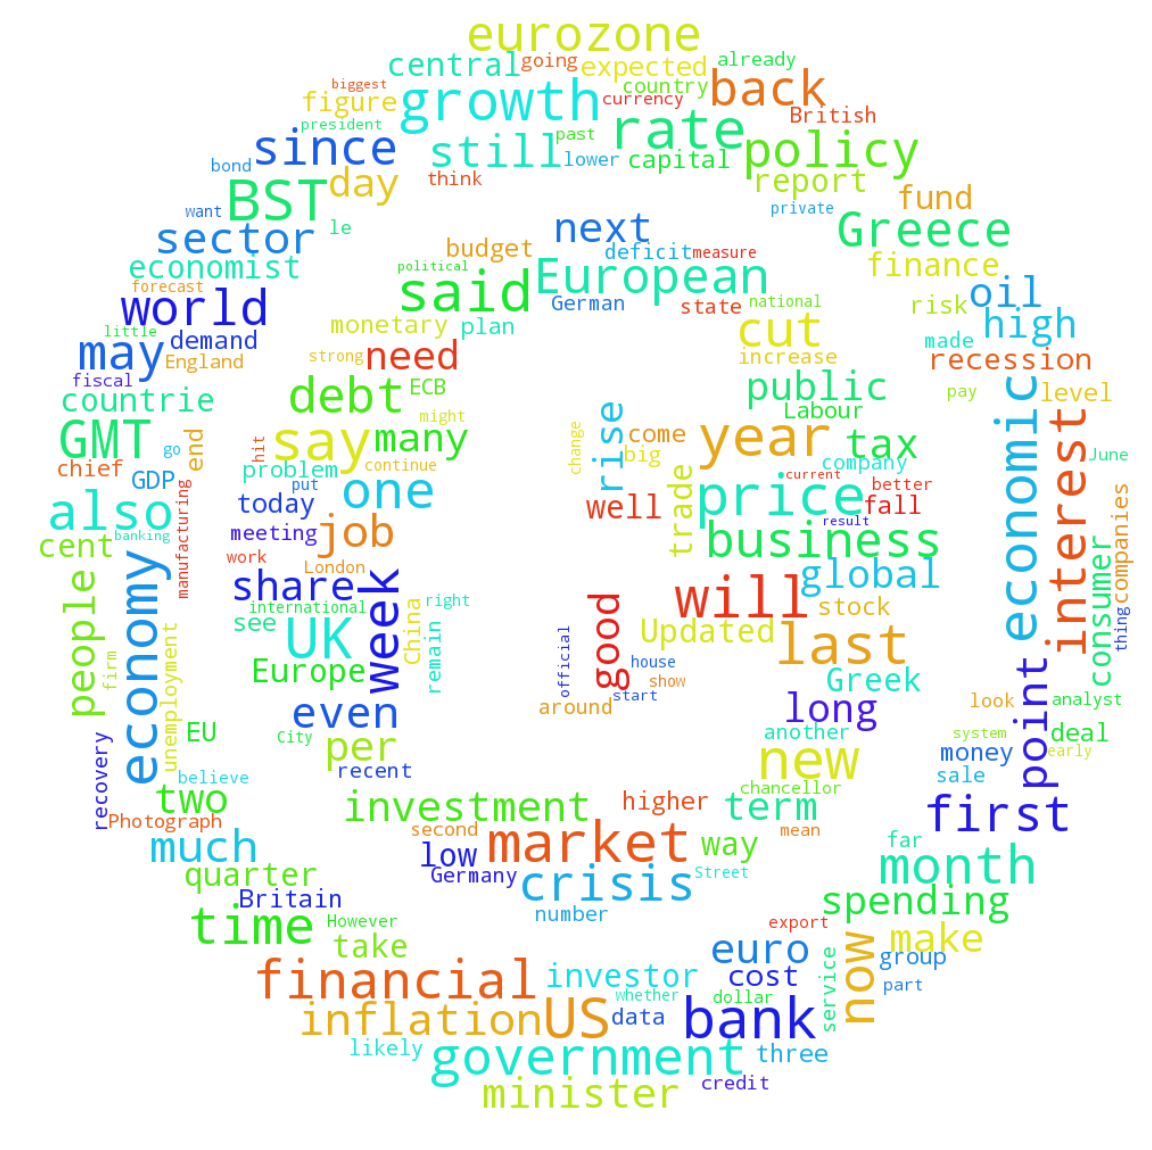

In [77]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_business)
plt.axis("off")
plt.show()

In [78]:
politics_news = relevant_df[relevant_df['Section'] == 'politics']
politics_words = vectorizer.fit_transform(politics_news['Body Text'])
politics_word_freqs = [(word, politics_words.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_politics_words = sorted (politics_word_freqs, key = lambda x: -x[1])
top_politics_words = pd.DataFrame.from_records(sorted_politics_words, columns=['word', 'count'])
top_politics_words.head(10)

,word,count
0,says,8191
1,said,6312
2,labour,6025
3,people,5023
4,government,4914
5,bst,3752
6,cameron,3498
7,tax,3406
8,party,3396
9,gmt,3307


In [79]:
wordcloud_politics = WordCloud(max_font_size=40).generate(''.join(list(politics_news['Body Text'].values)))

In [80]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_politics)
plt.axis("off")
plt.show()

NameError: name 'wordcloud' is not defined

In [ ]:
world_news = relevant_df[relevant_df['Section'] == 'world']
world_words = vectorizer.fit_transform(world_news['Body Text'])
world_word_freqs = [(word, world_words.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_world_words = sorted (world_word_freqs, key = lambda x: -x[1])
top_world_words = pd.DataFrame.from_records(sorted_world_words, columns=['word', 'count'])
top_world_words.head(10)

In [ ]:
world_news = relevant_df[relevant_df['Section'] == 'world']
wordcloud_world_news = WordCloud(max_font_size=40).generate(''.join(list(world_news['Body Text'].values)))

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Clustering of business news using k means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5,
                                 min_df=2, stop_words='english',
                                 use_idf=True)

In [ ]:
svd = TruncatedSVD()
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

reduced_words = lsa.fit_transform(business_words)

explained_variance = svd.explained_variance_ratio_.sum()

In [ ]:
explained_variance

In [ ]:
business_knn = KMeans(n_clusters=4, max_iter=100)

In [ ]:
business_knn.fit(reduced_words)

In [ ]:
predictions = business_knn.predict(reduced_words)

In [ ]:
business_news['sentiment'] = predictions

In [ ]:
print 'num class 1', len(business_news[business_news['sentiment'] == 1])
print 'num class 0', len(business_news[business_news['sentiment'] == 0])
# print 'num class 2', len(business_news[business_news['sentiment'] == 2])

In [ ]:
class_0_indices = [i for i, s in enumerate(business_news['sentiment'] == 0) if s == True]
class_1_indices = [i for i, s in enumerate(business_news['sentiment'] == 1) if s == True]
class_2_indices = [i for i, s in enumerate(business_news['sentiment'] == 2) if s == True]
class_3_indices = [i for i, s in enumerate(business_news['sentiment'] == 3) if s == True]

In [ ]:
plt.scatter(reduced_words[class_0_indices,0], reduced_words[class_0_indices,1], color='r')
plt.scatter(reduced_words[class_1_indices,0], reduced_words[class_1_indices,1], color='b')
plt.scatter(reduced_words[class_2_indices,0], reduced_words[class_2_indices,1], color='g')
plt.scatter(reduced_words[class_3_indices,0], reduced_words[class_3_indices,1], color='m')

In [ ]:
# Euro category
[headline for headline in business_news.iloc[class_0_indices]['Headline'][-30:]]

In [ ]:
[headline for headline in business_news.iloc[class_1_indices]['Headline'][-30:]]

In [ ]:
## Greece category????
[headline for headline in business_news.iloc[class_2_indices]['Headline'][-30:]]

In [ ]:
# negative sentiment business article 
print business_news[business_news['sentiment'] == 1].iloc[0]['Headline']
business_news[business_news['sentiment'] == 1].iloc[0]['Body Text']

In [ ]:
# positive sentiment business article
print business_news[business_news['sentiment'] == 0].iloc[0]['Headline']
business_news[business_news['sentiment'] == 0].iloc[0]['Body Text']

## Analysis

The article features quotes like "UK rates are going to go up and up", and "The pound is already at absurdly high levels", "There is also a lot of confidence in the Bank of England's Monetary Policy Committee"

In [ ]:
# positive sentiment business article
print business_news[business_news['sentiment'] == 2].iloc[0]['Headline']
business_news[business_news['sentiment'] == 2].iloc[0]['Body Text']

### Examine words in each class

In [ ]:
class_vectorizer = CountVectorizer(max_df=0.5,min_df=2,stop_words='english')
class_1_words = class_vectorizer.fit_transform(business_news[business_news['sentiment'] == 1]['Body Text'])
class_1_word_freqs = [(word, class_1_words.getcol(idx).sum()) for word, idx in class_vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_class_1_words = sorted (class_1_word_freqs, key = lambda x: -x[1])
top_class_1_words = pd.DataFrame.from_records(sorted_class_1_words, columns=['word', 'count'])
top_class_1_words.head(10)

In [ ]:
class_vectorizer = CountVectorizer(max_df=0.5,min_df=2,stop_words='english')
class_0_words = class_vectorizer.fit_transform(business_news[business_news['sentiment'] == 0]['Body Text'])
class_0_word_freqs = [(word, class_0_words.getcol(idx).sum()) for word, idx in class_vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_class_0_words = sorted (class_0_word_freqs, key = lambda x: -x[1])
top_class_0_words = pd.DataFrame.from_records(sorted_class_0_words, columns=['word', 'count'])
top_class_0_words.head(10)

In [ ]:
class_vectorizer = CountVectorizer(max_df=0.5,min_df=2,stop_words='english')
class_2_words = class_vectorizer.fit_transform(business_news[business_news['sentiment'] == 1]['Body Text'])
class_2_word_freqs = [(word, class_2_words.getcol(idx).sum()) for word, idx in class_vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_class_2_words = sorted (class_2_word_freqs, key = lambda x: -x[1])
top_class_2_words = pd.DataFrame.from_records(sorted_class_2_words, columns=['word', 'count'])
top_class_2_words.head(10)